#### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings(action='ignore')
warnings.warn('this is a warning!')

#### Reading the Dataset

In [4]:
data=pd.read_csv('dataset/water_dataX.csv',encoding='ISO-8859-1',low_memory=False)

In [5]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [6]:
data.describe()

,year
count,1991.000000
mean,2010.038172
std,3.057333
min,2003.000000
25%,2008.000000
50%,2011.000000
75%,2013.000000
max,2014.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   STATION CODE                      1991 non-null   object
 1   LOCATIONS                         1991 non-null   object
 2   STATE                             1991 non-null   object
 3   Temp                              1991 non-null   object
 4   D.O. (mg/l)                       1991 non-null   object
 5   PH                                1991 non-null   object
 6   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 7   B.O.D. (mg/l)                     1991 non-null   object
 8   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 9   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 10  TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
 11  year                              1991 non-null   int64 
dtypes: int64(1), object(

In [8]:
data.shape

(1991, 12)

In [9]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

#### Checking for missing values

In [10]:
data.isnull().any()

STATION CODE                        False
LOCATIONS                           False
STATE                               False
Temp                                False
D.O. (mg/l)                         False
PH                                  False
CONDUCTIVITY (µmhos/cm)             False
B.O.D. (mg/l)                       False
NITRATENAN N+ NITRITENANN (mg/l)    False
FECAL COLIFORM (MPN/100ml)          False
TOTAL COLIFORM (MPN/100ml)Mean      False
year                                False
dtype: bool

In [11]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [12]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [13]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [14]:
data.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1899.000000,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.859000e+03,1991.000000
mean,26.209814,6.392637,112.090674,1786.466394,6.940049,1.623079,5.336872e+05,2010.038172
std,3.366388,1.332938,1878.930716,5552.276223,29.400026,4.090481,1.423428e+07,3.057333
min,10.000000,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00,2003.000000
25%,24.750000,5.900000,6.900000,78.000000,1.200000,0.240000,1.060000e+02,2008.000000
50%,27.000000,6.700000,7.300000,183.000000,1.896500,0.516000,4.680000e+02,2011.000000
75%,28.400000,7.200000,7.700000,592.750000,3.600000,1.500000,1.919000e+03,2013.000000
max,35.000000,11.400000,67115.000000,65700.000000,534.500000,108.700000,5.110909e+08,2014.000000


In [15]:
data.isnull().sum()

STATION CODE                          0
LOCATIONS                             0
STATE                                 0
Temp                                 92
D.O. (mg/l)                          31
PH                                    8
CONDUCTIVITY (µmhos/cm)              25
B.O.D. (mg/l)                        43
NITRATENAN N+ NITRITENANN (mg/l)    225
FECAL COLIFORM (MPN/100ml)            0
TOTAL COLIFORM (MPN/100ml)Mean      132
year                                  0
dtype: int64

In [16]:
data['Temp'].fillna(data['Temp'].mean(),inplace=True)
data['D.O. (mg/l)'].fillna(data['D.O. (mg/l)'].mean(),inplace=True)
data['PH'].fillna(data['PH'].mean(),inplace=True)
data['CONDUCTIVITY (µmhos/cm)'].fillna(data['CONDUCTIVITY (µmhos/cm)'].mean(),inplace=True)
data['B.O.D. (mg/l)'].fillna(data['B.O.D. (mg/l)'].mean(),inplace=True)
data['NITRATENAN N+ NITRITENANN (mg/l)'].fillna(data['NITRATENAN N+ NITRITENANN (mg/l)'].mean(),inplace=True)
data['TOTAL COLIFORM (MPN/100ml)Mean'].fillna(data['TOTAL COLIFORM (MPN/100ml)Mean'].mean(),inplace=True)

In [17]:
data.isnull().sum()

STATION CODE                        0
LOCATIONS                           0
STATE                               0
Temp                                0
D.O. (mg/l)                         0
PH                                  0
CONDUCTIVITY (µmhos/cm)             0
B.O.D. (mg/l)                       0
NITRATENAN N+ NITRITENANN (mg/l)    0
FECAL COLIFORM (MPN/100ml)          0
TOTAL COLIFORM (MPN/100ml)Mean      0
year                                0
dtype: int64

In [18]:
data.drop(['FECAL COLIFORM (MPN/100ml)'],axis=1,inplace=True)

In [19]:
data=data.rename(columns={'PH':'ph'})
data=data.rename(columns={'D.O. (mg/l)':'do'})
data=data.rename(columns={'CONDUCTIVITY (µmhos/cm)':'co'})
data=data.rename(columns={'B.O.D. (mg/l)':'bod'})
data=data.rename(columns={'NITRATENAN N+ NITRITENANN (mg/l)':'na'})
data=data.rename(columns={'TOTAL COLIFORM (MPN/100ml)Mean':'tc'})
data=data.rename(columns={'STATION CODE':'station'})
data=data.rename(columns={'LOCATIONS':'location'})
data=data.rename(columns={'STATE':'state'})

In [20]:
data

,station,location,state,Temp,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003


Water Quality Index (WQI) Calculation

a)calculation of pH

In [21]:
data['nph']=data.ph.apply(lambda x:(100 if (8.5>=x>=7)
                                else(80 if (8.6>=x>=8.5) or (6.9>=x>=6.8)
                                    else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7)
                                        else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                            else 0)))))

b)calculation of dissolved oxygen

In [22]:
data['ndo']=data.co.apply(lambda x:(100 if (x>=6)
                                else(80 if (6>=x>=5.1)
                                    else(60 if (5>=x>=4.1)
                                        else(40 if (4>=x>=3)
                                            else 0)))))

c)calculation of total coliform

In [23]:
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)
                                else(80 if (50>=x>=5)
                                    else(60 if (500>=x>=50)
                                        else(40 if (10000>=x>=500)
                                            else 0)))))

d)calculation of B.D.O

In [24]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)
                                else(80 if (6>=x>=3)
                                    else(60 if (80>=x>=6)
                                        else(40 if (125>=x>=80)
                                            else 0)))))

e)calculation of electric conductivity

In [25]:
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)
                                else(80 if (150>=x>=75)
                                    else(60 if (225>=x>=150)
                                        else(40 if (300>=x>=225)
                                            else 0)))))

f)calculation of nitrate

In [26]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)
                                else(80 if (50>=x>=20)
                                    else(60 if (100>=x>=50)
                                        else(40 if (200>=x>=100)
                                            else 0)))))

Calculation of Water Quality Index WQI

In [27]:
data['wph']=data.nph*0.165
data['wdo']=data.ndo*0.281
data['wbdo']=data.nbdo*0.234
data['wec']=data.nec*0.009
data['wna']=data.nna*0.028
data['wco']=data.nco*0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wec+data.wna+data.wco
data

,station,location,state,Temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,...,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,...,100,60,100,16.5,28.10,23.40,0.54,2.8,11.24,82.58
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,...,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,...,80,100,100,13.2,28.10,18.72,0.90,2.8,11.24,74.96
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,...,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,...,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


In [28]:
pd.set_option('display.max_columns', None)
data

,station,location,state,Temp,do,ph,co,bod,na,tc,year,nph,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.600000,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,100,100,80,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,100,100,40,100,60,100,16.5,28.10,23.40,0.54,2.8,11.24,82.58
2,1475,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,80,100,40,80,100,100,13.2,28.10,18.72,0.90,2.8,11.24,74.96
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,100,100,40,100,80,100,16.5,28.10,23.40,0.72,2.8,11.24,82.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,26.209814,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29.000000,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,0,100,60,100,100,100,0.0,28.10,23.40,0.90,2.8,16.86,72.06
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28.000000,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28.000000,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,0,100,40,100,100,100,0.0,28.10,23.40,0.90,2.8,11.24,66.44


Calculation of overall WQI for each year

In [29]:
average=data.groupby('year')['wqi'].mean()
average.head()

year
2003    64.195909
2004    61.290000
2005    75.840672
2006    75.585905
2007    76.762000
Name: wqi, dtype: float64

#### Data visualization

univariate Analysis

a)displot

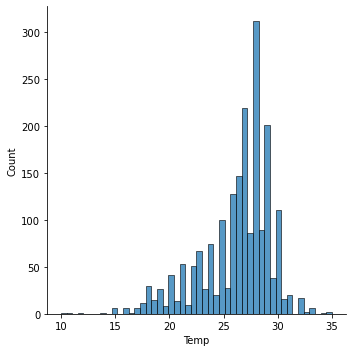

In [30]:
sns.displot(data.Temp)
plt.show()

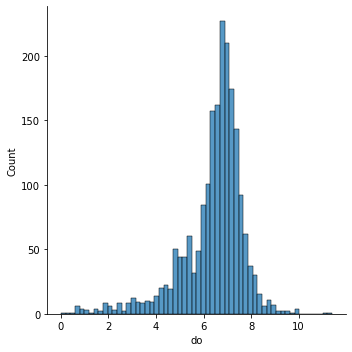

In [31]:
sns.displot(data.do)
plt.show()

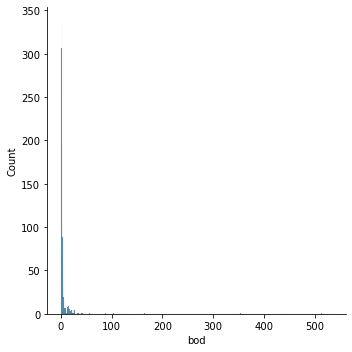

In [32]:
sns.displot(data.bod)
plt.show()

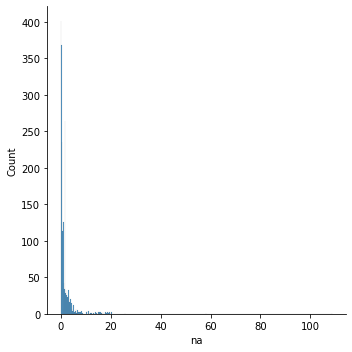

In [33]:
sns.displot(data.na)
plt.show()

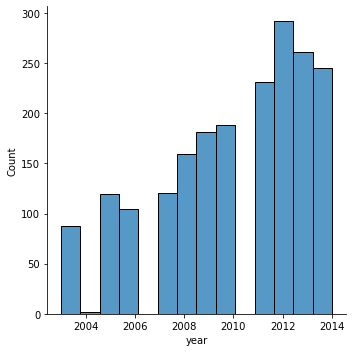

In [34]:
sns.displot(data.year)
plt.show()

b)Countplot

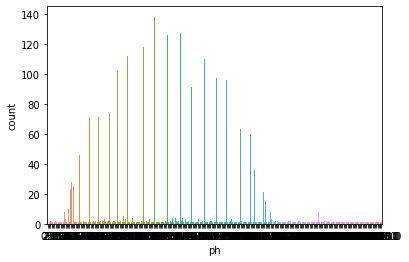

In [35]:
sns.countplot(data.ph)
plt.show()

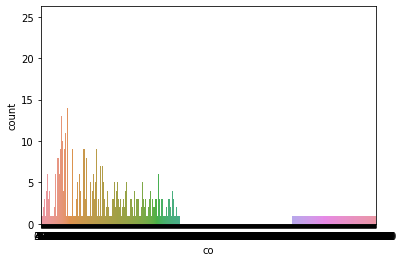

In [36]:
sns.countplot(data.co)
plt.show()

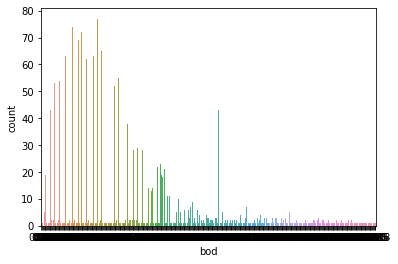

In [37]:
sns.countplot(data.bod)
plt.show()

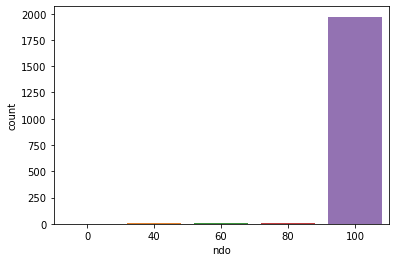

In [38]:
sns.countplot(data.ndo)
plt.show()

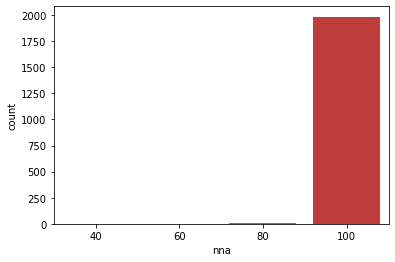

In [39]:
sns.countplot(data.nna)
plt.show()

c)Distplot

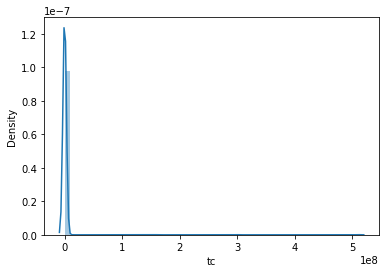

In [40]:
sns.distplot(data.tc)
plt.show()

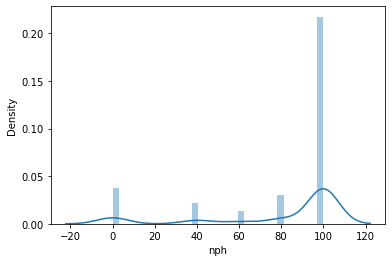

In [41]:
sns.distplot(data.nph)
plt.show()

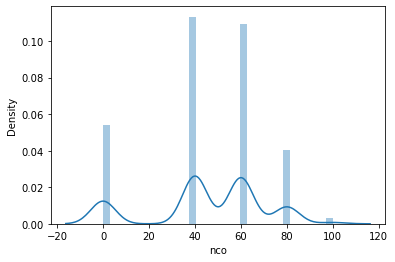

In [42]:
sns.distplot(data.nco)
plt.show()

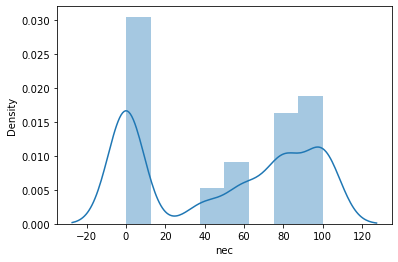

In [43]:
sns.distplot(data.nec)
plt.show()

d)Pie chart

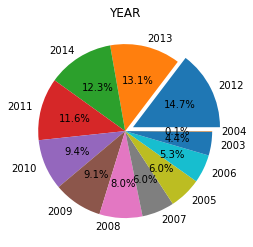

In [44]:
plt.pie(data.year.value_counts(),[0.1,0,0,0,0,0,0,0,0,0,0,0],labels=[2012,2013,2014,2011,2010,2009,2008,2007,2005,2006,2003,2004 ],autopct='%1.1f%%')
plt.title('YEAR')
plt.show()

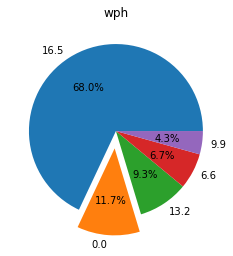

In [45]:
plt.pie(data.wph.value_counts(),[0,0.2,0,0,0],labels=[16.5,0.0,13.2,6.6,9.9],autopct='%1.1f%%')
plt.title('wph')
plt.show()

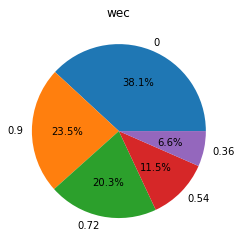

In [46]:
plt.pie(data.wec.value_counts(),labels=[0,0.90,0.72,0.54,0.36],autopct='%1.1f%%')
plt.title('wec')
plt.show()

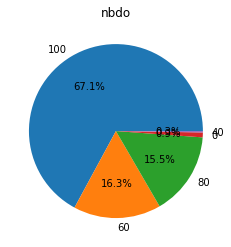

In [47]:
plt.pie(data.nbdo.value_counts(),labels=[100,60,80,0,40],autopct='%1.1f%%')
plt.title('nbdo')
plt.show()

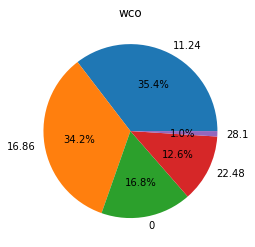

In [48]:
plt.pie(data.wco.value_counts(),labels=[11.24,16.86,0,22.48,28.10],autopct='%1.1f%%')
plt.title('wco')
plt.show()

#### Bivariate Analysis 

a)Line plot

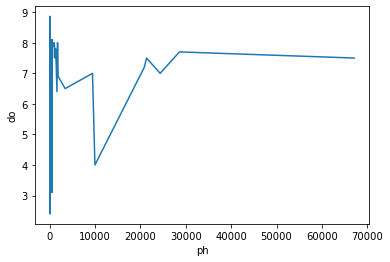

In [49]:
sns.lineplot(data.ph,data.do)
plt.show()

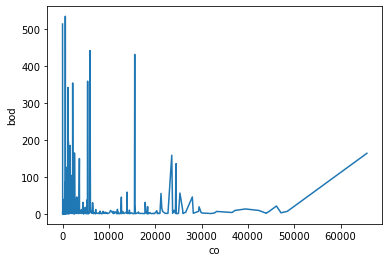

In [50]:
sns.lineplot(data.co,data.bod)
plt.show()

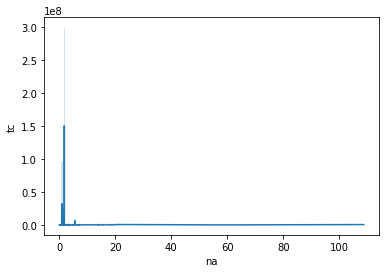

In [51]:
sns.lineplot(data.na,data.tc)
plt.show()

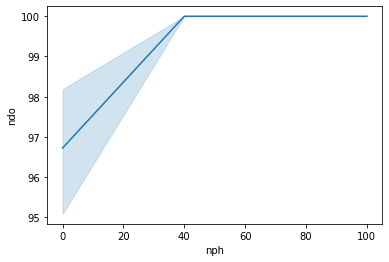

In [52]:
sns.lineplot(data.nph,data.ndo)
plt.show()

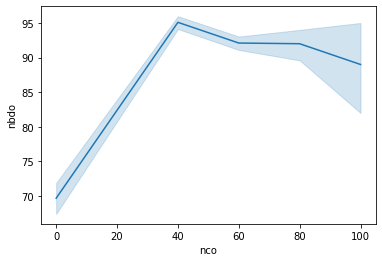

In [53]:
sns.lineplot(data.nco,data.nbdo)
plt.show()

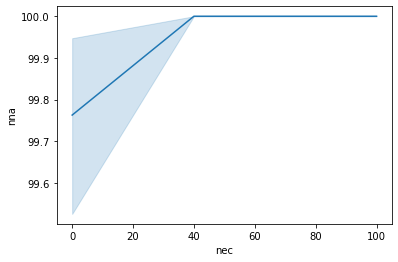

In [54]:
sns.lineplot(data.nec,data.nna)
plt.show()

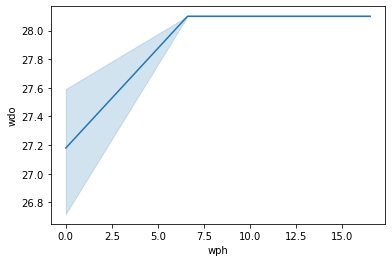

In [55]:
sns.lineplot(data.wph,data.wdo)
plt.show()

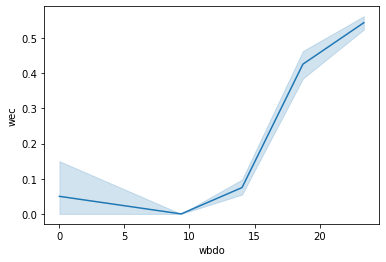

In [56]:
sns.lineplot(data.wbdo,data.wec)
plt.show()

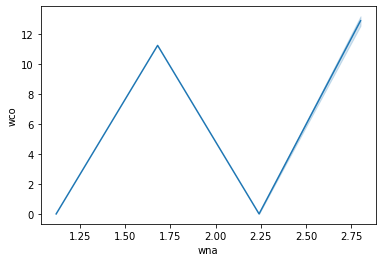

In [57]:
sns.lineplot(data.wna,data.wco)
plt.show()

b)Scatter plot

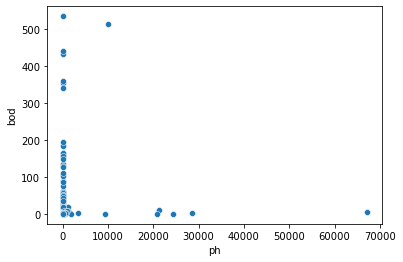

In [58]:
sns.scatterplot(data.ph,data.bod)
plt.show()

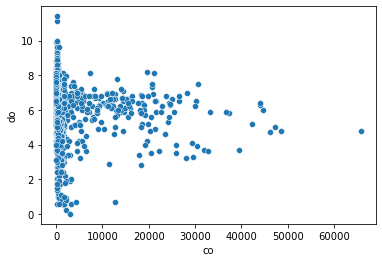

In [59]:
sns.scatterplot(data.co,data.do)
plt.show()

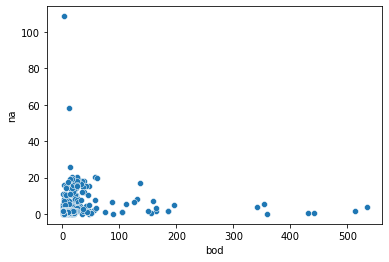

In [60]:
sns.scatterplot(data.bod,data.na)
plt.show()

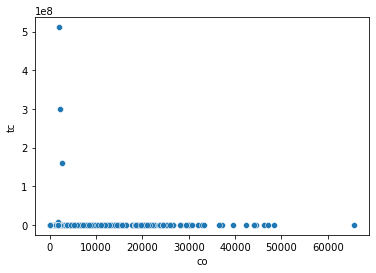

In [61]:
sns.scatterplot(data.co,data.tc)
plt.show()

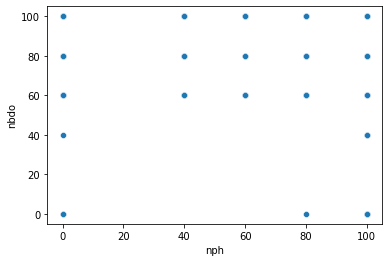

In [62]:
sns.scatterplot(data.nph,data.nbdo)
plt.show()

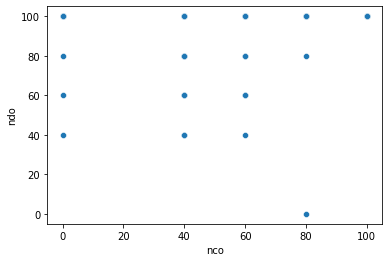

In [63]:
sns.scatterplot(data.nco,data.ndo)
plt.show()

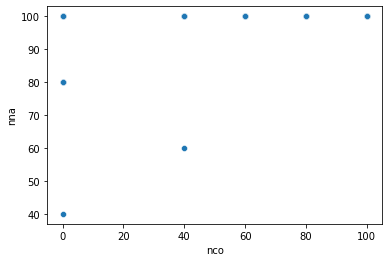

In [64]:
sns.scatterplot(data.nco,data.nna)
plt.show()

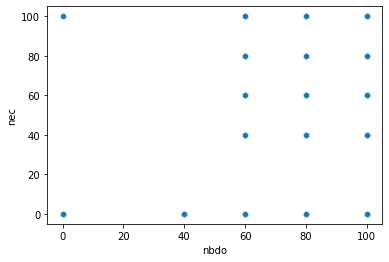

In [65]:
sns.scatterplot(data.nbdo,data.nec)
plt.show()

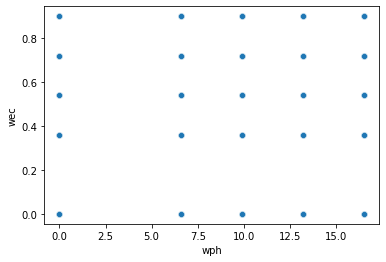

In [66]:
sns.scatterplot(data.wph,data.wec)
plt.show()

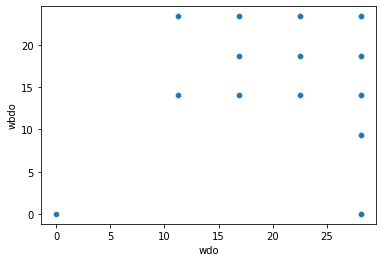

In [67]:
sns.scatterplot(data.wdo,data.wbdo)
plt.show()

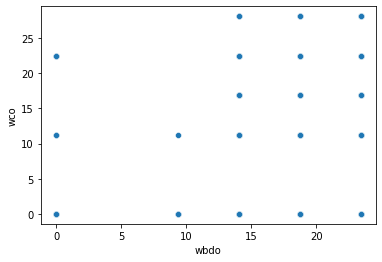

In [68]:
sns.scatterplot(data.wbdo,data.wco)
plt.show()

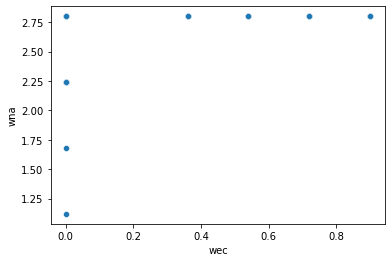

In [69]:
sns.scatterplot(data.wec,data.wna)
plt.show()

#### Multivariate analysis

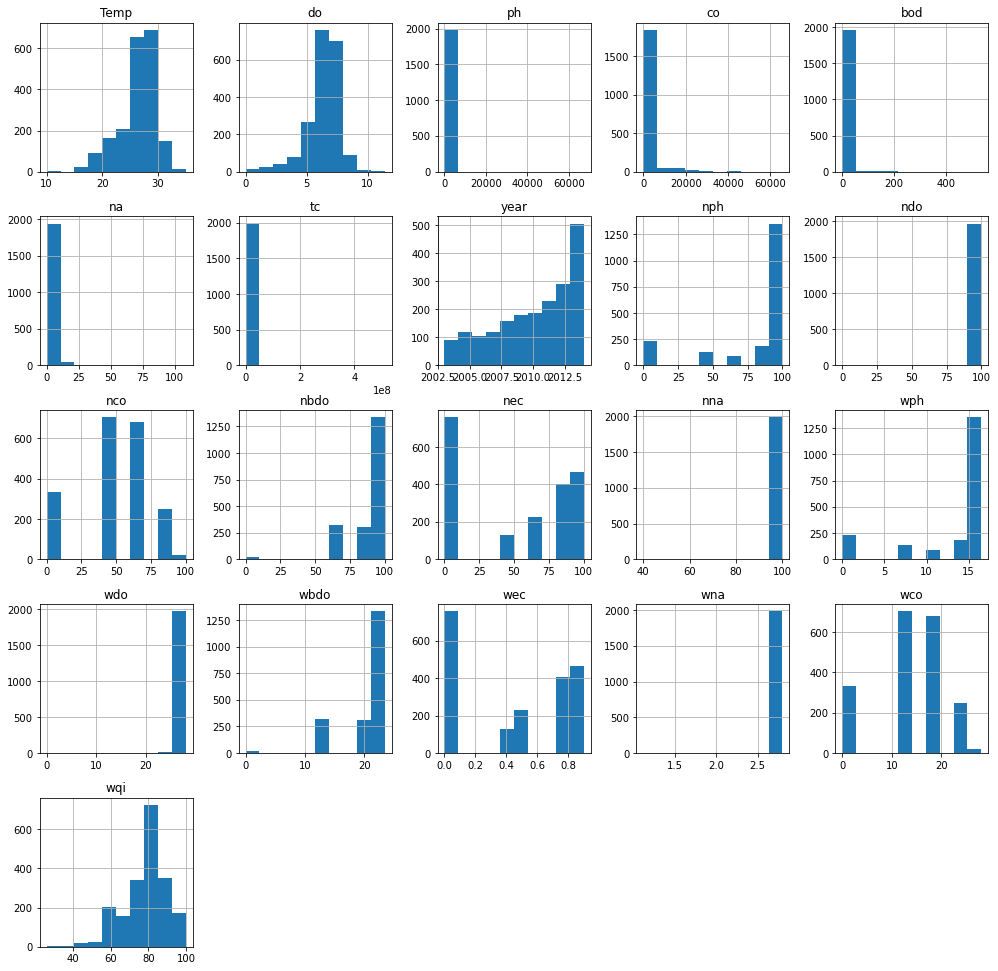

In [70]:
data.hist(figsize=(17,17))
plt.show()

#### Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le=LabelEncoder()

In [73]:
data.location=le.fit_transform(data.location)
data.state=le.fit_transform(data.state)

In [74]:
data.head()

,station,location,state,Temp,do,ph,co,bod,na,tc,year,nph,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,83,21,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,80,60,60,100,16.5,28.1,14.04,0.54,2.8,22.48,84.46
1,1399,664,51,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,100,40,100,60,100,16.5,28.1,23.40,0.54,2.8,11.24,82.58
2,1475,665,51,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,40,100,60,100,13.2,28.1,23.40,0.54,2.8,11.24,79.28
3,3181,495,51,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,100,40,80,100,100,13.2,28.1,18.72,0.90,2.8,11.24,74.96
4,3182,496,51,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,100,40,100,80,100,16.5,28.1,23.40,0.72,2.8,11.24,82.76


Finding correlation Matrix Using Heatmap

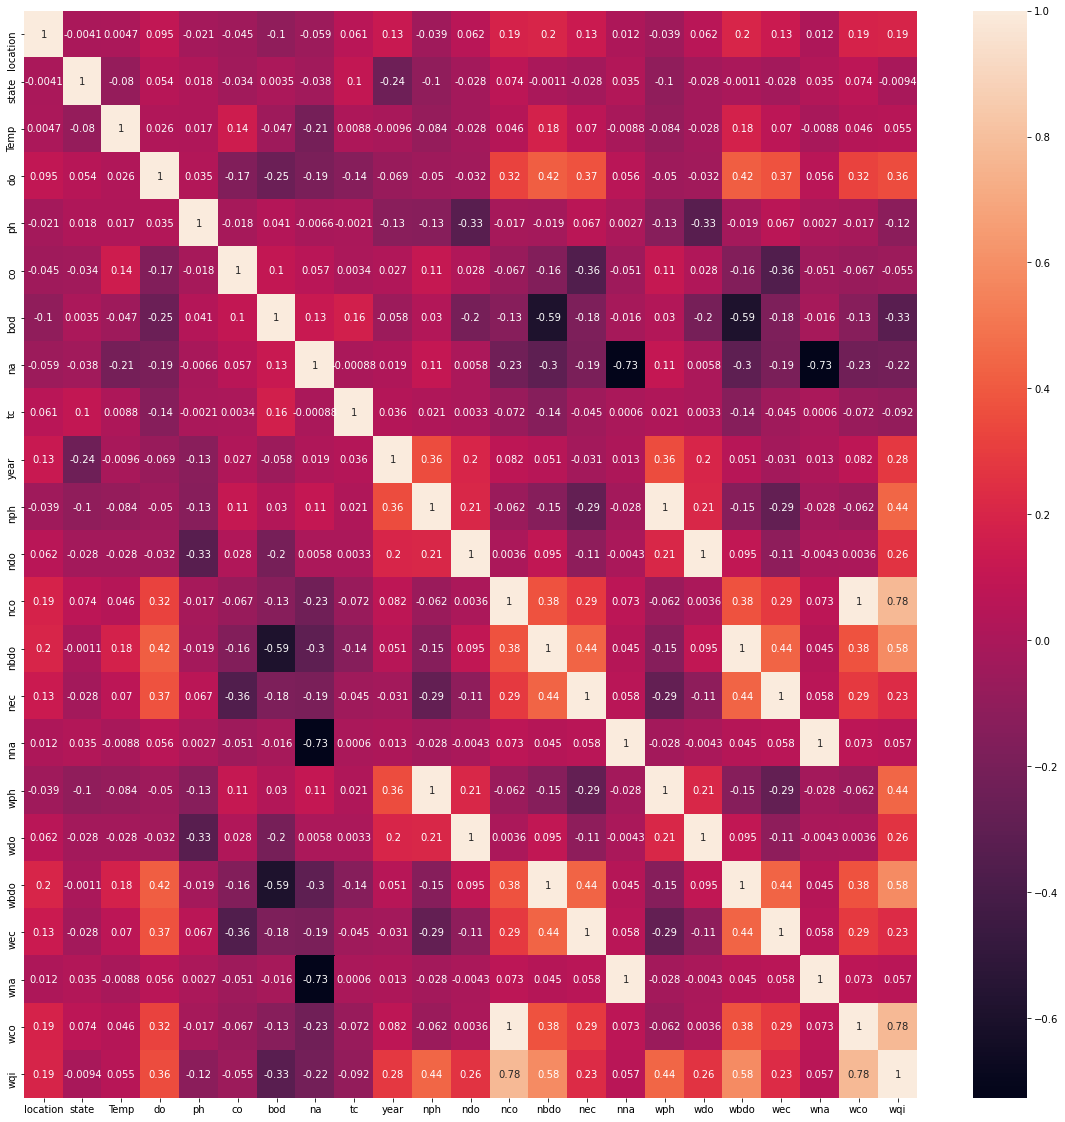

In [75]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [76]:
df=data.drop(['nco','nph','ndo','nbdo','nec','nna','location','state','station','wph','wdo','wbdo','wec','wna','wco','Temp'],axis=1)

In [77]:
df

,do,ph,co,bod,na,tc,year,wqi
0,6.7,7.5,203.0,6.940049,0.100000,27.0,2014,84.46
1,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,82.58
2,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,79.28
3,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,74.96
4,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,82.76
...,...,...,...,...,...,...,...,...
1986,7.9,738.0,7.2,2.700000,0.518000,202.0,2003,72.06
1987,7.5,585.0,6.3,2.600000,0.155000,315.0,2003,72.06
1988,7.6,98.0,6.2,1.200000,1.623079,570.0,2003,66.44
1989,7.7,91.0,6.5,1.300000,1.623079,562.0,2003,66.44


In [78]:
df.corr().wqi.sort_values(ascending=False)

wqi     1.000000
do      0.355792
year    0.283360
co     -0.055462
tc     -0.092151
ph     -0.124176
na     -0.220407
bod    -0.328054
Name: wqi, dtype: float64

#### Splitting Dependent and Independent Columns

In [79]:
data.drop(['location','station','state'],axis =1,inplace=True)

In [80]:
data.head()

,Temp,do,ph,co,bod,na,tc,year,nph,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,30.6,6.7,7.5,203.0,6.940049,0.1,27.0,2014,100,100,80,60,60,100,16.5,28.1,14.04,0.54,2.8,22.48,84.46
1,29.8,5.7,7.2,189.0,2.000000,0.2,8391.0,2014,100,100,40,100,60,100,16.5,28.1,23.40,0.54,2.8,11.24,82.58
2,29.5,6.3,6.9,179.0,1.700000,0.1,5330.0,2014,80,100,40,100,60,100,13.2,28.1,23.40,0.54,2.8,11.24,79.28
3,29.7,5.8,6.9,64.0,3.800000,0.5,8443.0,2014,80,100,40,80,100,100,13.2,28.1,18.72,0.90,2.8,11.24,74.96
4,29.5,5.8,7.3,83.0,1.900000,0.4,5500.0,2014,100,100,40,100,80,100,16.5,28.1,23.40,0.72,2.8,11.24,82.76


In [85]:
x=df.iloc[:,0:7].values

In [86]:
x.shape

(1991, 7)

In [83]:
y=df.iloc[:,-1:].values

In [84]:
y.shape

(1991, 1)

In [87]:
print(x)

[[6.70000000e+00 7.50000000e+00 2.03000000e+02 ... 1.00000000e-01
  2.70000000e+01 2.01400000e+03]
 [5.70000000e+00 7.20000000e+00 1.89000000e+02 ... 2.00000000e-01
  8.39100000e+03 2.01400000e+03]
 [6.30000000e+00 6.90000000e+00 1.79000000e+02 ... 1.00000000e-01
  5.33000000e+03 2.01400000e+03]
 ...
 [7.60000000e+00 9.80000000e+01 6.20000000e+00 ... 1.62307871e+00
  5.70000000e+02 2.00300000e+03]
 [7.70000000e+00 9.10000000e+01 6.50000000e+00 ... 1.62307871e+00
  5.62000000e+02 2.00300000e+03]
 [7.60000000e+00 1.10000000e+02 5.70000000e+00 ... 1.62307871e+00
  5.46000000e+02 2.00300000e+03]]


In [88]:
print(y)

[[84.46]
 [82.58]
 [79.28]
 ...
 [66.44]
 [66.44]
 [60.82]]


#### Splitting the Data into Train and Test

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=10)

In [106]:
#Feature Scaling
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

In [107]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

#### Model Evaluation

In [108]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.4764761904761988
MSE: 2.7584894536340836
RMSE: 1.6608700893309156


In [109]:
metrics.r2_score(y_test, y_pred)

0.9743618152161229

In [94]:
import pickle
pickle.dump(regressor,open('wqi.pkl','wb'))
model=pickle.load(open('wqi.pkl','rb'))

In [110]:
regressor.predict([[5.7,7.2,189.0,2.000000,0.200000,8391.0,2014]])

array([82.58])

In [111]:
regressor.predict([[6.7,7.5,203.0,6.940049,0.1,27.0,2014]])

array([83.156])